In [1]:
from Preprocessing.data_clean import remove_221_rows, dropping_no_betting_data, josh_features, fill_f_pm_01m, class_or_rating_average, oli_features
from Preprocessing.V2.v2_preprocessor_js import preprocess_features_v2
import pandas as pd

data  = pd.read_csv("../../../raw_data/hr_data_0409_221rem.csv")
data['f_ko'] = pd.to_datetime(data['f_ko'], format = "%d/%m/%Y %H:%M")

data_cleaned = remove_221_rows(data)
data_cleaned = dropping_no_betting_data(data_cleaned)
data_cleaned = josh_features(data_cleaned)
data_cleaned = class_or_rating_average(data_cleaned)
data_cleaned = oli_features(data_cleaned)
data_cleaned = fill_f_pm_01m(data_cleaned)



preprocessed_data = preprocess_features_v2(data_cleaned)

preprocessed_data.to_csv("../../../raw_data/data_cleaned_and_preprocessed.csv", index=False)

data = pd.read_csv("../../../raw_data/data_cleaned_and_preprocessed.csv")
data.sort_values(by='f_ko')
data = data.reset_index(drop=True)

/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_55092/2587991398.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data  = pd.read_csv("../../../raw_data/hr_data_0409_221rem.csv")


first 221 rows removed. New shape = (120454, 116)


/Users/joshstone/code/lucasglanville/and_theyre_off_backend/Preprocessing/data_clean.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_impute] = data[columns_to_impute].apply(impute_row, axis=1)


Cleaned up missing odds. New shape = (120193, 116)
Added Josh features. New shape = (120193, 123)
Added Oli features 2/4. New shape = (120193, 125)
Added Oli features 4/4. New shape = (120193, 127)
number of columns:  128
✅ DROPPED IRRELEVANT COLUMNS
✅ DROPPED ROWS WITH NULL VALUES
✅ WHITESPACE STRIPPED FROM 'f_track'
✅ WINNERS CODED AS '1', REST '0'
✅ 'f_ko' CONVERTED TO DATETIME
✅ TRACK CONDITIONS ORDINALLY ENCODED
✅ NUMERIC FEATURES MINMAX-SCALED
✅ IMPUTED 'no_headgear' for NULLS IN 'f_headgear'
✅ IMPUTED MEAN FOR NULLS IN 'f_dob' & 'f_prb_avg'
✅ IMPUTED '0' FOR NULLS IN 68 x FEATURES
✅ CAT. FEATURES OH-ENCODED (Track, Headgear, Country)
number of columns:  90
✅ COLUMN TRANSFORMER ASSEMBLED
⏳ FIT_TRANSFORMING THE PREPROCESSING PIPE...
number of columns:  166
✅ DATA PROCESSED WITH SHAPE: (119562, 166)


In [2]:
data = data[(data['f_pm_05m'] <= 50)]

In [3]:
data = data.reset_index(drop=True)

In [4]:
data.shape

(106246, 166)

In [5]:
backtest = data[['f_ko','f_id', 'id','f_horse','f_pm_01m', 'linear_target', 'f_place']]




data['pred_isp_prob'] = 1 / data['pred_isp']
data['linear_target_prob'] = 1 / data['linear_target']

In [62]:
backtest_test

,f_ko,f_id,id,f_horse,f_pm_01m,linear_target,f_place,model_preds,odds_preds,model_edge_basic,model_edge_proportionate,race_model_preds,race_odds_preds,model_preds_scaled,model_edge_basic_scaled,model_edge_prop_scaled
70000,2022-10-08 15:40:00,1.665240e+13,1.665240e+13,Inchicore,28.0,-1.0,0,0.79,0.035714,0.756120,22.171360,11.663326,0.460674,0.031276,-0.004439,0.875717
70001,2022-10-08 15:10:00,1.665240e+13,1.665240e+13,Downforce,46.0,-1.0,0,0.79,0.021739,0.769446,36.394530,11.663326,0.460674,0.031250,0.009511,1.437499
70002,2022-10-08 15:40:00,1.665240e+13,1.665240e+13,Call My Bluff,20.0,-1.0,0,0.56,0.050000,0.514380,11.287608,11.663326,0.460674,0.022292,-0.027708,0.445834
70003,2022-10-08 16:25:00,1.665240e+13,1.665240e+13,Monsieur Lambrays,21.0,-1.0,0,0.47,0.047619,0.426014,9.946284,11.663326,0.460674,0.018707,-0.028912,0.392855
70004,2022-10-08 16:55:00,1.665240e+13,1.665240e+13,Juyush,26.0,-1.0,0,0.48,0.038462,0.440233,12.446051,11.663326,0.460674,0.018907,-0.019554,0.491590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106241,2023-09-03 16:55:00,1.693760e+13,1.693760e+13,Angel Of The Sea,70.0,-1.0,0,0.78,0.014286,0.764951,54.546605,7.815952,3.004201,0.299514,0.285228,20.965962
106242,2023-09-03 16:55:00,1.693760e+13,1.693760e+13,Eagles Reign,50.0,-1.0,0,0.81,0.020000,0.787911,40.395528,7.815952,3.004201,0.310535,0.290535,15.526743
106243,2023-09-03 16:55:00,1.693760e+13,1.693760e+13,Ruler Of The River,65.0,-1.0,0,0.97,0.015385,0.950317,62.770579,7.815952,3.004201,0.371185,0.355800,24.126994
106244,2023-09-03 17:30:00,1.693760e+13,1.693760e+13,Rotolo,20.0,-1.0,0,0.86,0.050000,0.805563,17.111250,7.815952,3.004201,0.328851,0.278851,6.577015


In [7]:

X = data[['stall_position', 
          'iv_trainer_l16r', 'iv_jockey_l16r',
          'ae_trainer_l16r' ,'ae_jockey_l16r', 'pred_isp_prob', 'f_runners']]

# X = data[['f_runners','or_rating_vs_avg_race', 'stall_position', 
#           'iv_horse_at', 'iv_trainer_l200r', 'iv_trainer_l50r', 'iv_trainer_l16r', 'iv_trainer_at',
#           'iv_jockey_l200r', 'iv_jockey_l50r', 'iv_jockey_l16r', 'iv_jockey_at',
#           'ae_horse_l10r', 'ae_horse_l5r' , 'ae_horse_l2r' ,'ae_horse_at',
#           'ae_trainer_l200r' , 'ae_trainer_l50r' , 'ae_trainer_l16r' , 'ae_trainer_at',
#           'ae_jockey_l200r' , 'ae_jockey_l50r', 'ae_jockey_l16r' , 'ae_jockey_at' , 'pred_isp']]

#'f_dob', 'f_prb_avg',





y = data[["f_place","pred_isp"]] #OR 'linear_target'

print(data.shape)
print(X.shape)
print(y.shape)
print(backtest.shape)

#Train = Year 1
#Val = Year 2
#Test = Year 3 (6 months)

print(X.head(2))
print(y.head(2))

(106246, 168)
(106246, 7)
(106246, 2)
(106246, 7)
   stall_position  iv_trainer_l16r  iv_jockey_l16r  ae_trainer_l16r  \
0        0.272706          0.33299         0.16701         0.036058   
1        0.127247          0.00000         0.10000         0.000000   

   ae_jockey_l16r  pred_isp_prob  f_runners  
0         0.00731       0.266667     0.1875  
1         0.00559       0.222222     0.3125  
   f_place  pred_isp
0        1      3.75
1        1      4.50


In [8]:
X.shape

(106246, 7)

In [63]:
X_test.describe()

,stall_position,iv_trainer_l16r,iv_jockey_l16r,ae_trainer_l16r,ae_jockey_l16r,pred_isp_prob,f_runners
count,36246.000000,36246.000000,36246.000000,36246.000000,36246.000000,36246.000000,36246.000000
mean,0.306589,0.104735,0.105171,0.010458,0.008639,0.128341,0.292358
std,0.172912,0.088465,0.084060,0.008283,0.006865,0.079370,0.119952
min,0.001164,0.000000,0.000000,0.000000,0.000000,0.001000,0.031250
25%,0.156339,0.062887,0.062887,0.005029,0.004300,0.066667,0.218750
50%,0.305056,0.062887,0.062887,0.009844,0.008084,0.111111,0.281250
75%,0.454530,0.124742,0.124742,0.015408,0.012470,0.166667,0.375000
max,1.000000,1.000000,1.000000,0.176546,0.212332,0.833333,0.875000


In [55]:
max_row_index = X['ae_trainer_l16r'].idxmax()
max_row = X.loc[max_row_index]
max_row_index

33688

In [59]:
X[33687:33688]

,stall_position,iv_trainer_l16r,iv_jockey_l16r,ae_trainer_l16r,ae_jockey_l16r,pred_isp_prob,f_runners
33687,0.023332,0.062887,0.062887,0.005778,0.005246,0.133333,0.375


In [11]:
X_train = X.iloc[:40000]
X_val = X.iloc[40000:70000]
X_test = X.iloc[70000:]
y_train = y.iloc[:40000]
y_val = y.iloc[40000:70000]
y_test = y.iloc[70000:]
backtest_train = backtest.iloc[:40000]
backtest_val = backtest.iloc[40000:70000]
backtest_test = backtest.iloc[70000:]

In [12]:
X_val.shape

(30000, 7)

In [13]:
backtest_test

,f_ko,f_id,id,f_horse,f_pm_01m,linear_target,f_place
70000,2022-10-08 15:40:00,1.665240e+13,1.665240e+13,Inchicore,28.0,-1.0,0
70001,2022-10-08 15:10:00,1.665240e+13,1.665240e+13,Downforce,46.0,-1.0,0
70002,2022-10-08 15:40:00,1.665240e+13,1.665240e+13,Call My Bluff,20.0,-1.0,0
70003,2022-10-08 16:25:00,1.665240e+13,1.665240e+13,Monsieur Lambrays,21.0,-1.0,0
70004,2022-10-08 16:55:00,1.665240e+13,1.665240e+13,Juyush,26.0,-1.0,0
...,...,...,...,...,...,...,...
106241,2023-09-03 16:55:00,1.693760e+13,1.693760e+13,Angel Of The Sea,70.0,-1.0,0
106242,2023-09-03 16:55:00,1.693760e+13,1.693760e+13,Eagles Reign,50.0,-1.0,0
106243,2023-09-03 16:55:00,1.693760e+13,1.693760e+13,Ruler Of The River,65.0,-1.0,0
106244,2023-09-03 17:30:00,1.693760e+13,1.693760e+13,Rotolo,20.0,-1.0,0


In [14]:
#X_test.to_csv("NN1_X_test.csv", index = False)

In [15]:
#y_test.to_csv("NN1_y_test.csv", index = False)

In [16]:
#backtest_test.to_csv("NN1_backtest_test.csv", index = False)

In [17]:
#backtest_test.to_csv("NN1_backtest_test.csv")

In [18]:
#buggy data = 2532754    2021-06-20 03:55:00
                #29406    20-06-14 18:45:00

In [19]:
y_train.shape

(40000, 2)

In [20]:
y_test.shape

(36246, 2)

In [21]:
y_test.head()

,f_place,pred_isp
70000,0,19.0
70001,0,21.0
70002,0,21.0
70003,0,21.0
70004,0,21.0


In [22]:
y_test.shape

(36246, 2)

In [23]:
#X_test.to_csv("NN2_X_test_7.csv", index = False)

In [24]:
#y_test.to_csv("NN2_y_test_7.csv", index = False)

In [25]:
#backtest_test.to_csv("NN2_backtest_test_7.csv", index = False)

In [26]:
# def odds_loss(y_true, y_pred):
#     """
#     The function implements the custom loss function
    
#     Inputs
#     true : a vector of dimension batch_size, 7. A label encoded version of the output and the backp1_a and backp1_b
#     pred : a vector of probabilities of dimension batch_size , 5.
    
#     Returns 
#     the loss value
#     """
#     win_home_team = y_true[:, 0:1]
#     win_home_or_draw = y_true[:, 1:2]
#     win_away = y_true[:, 2:3]
#     win_away_or_draw = y_true[:, 3:4]
#     draw = y_true[:, 4:5]
#     no_bet = y_true[:, 5:6]
#     odds_a = y_true[:, 6:7]
#     odds_b = y_true[:, 7:8]
#     gain_loss_vector = K.concatenate([win_home_team * (odds_a - 1) + (1 - win_home_team) * -1,
#       win_home_or_draw * (1/(1 -1/odds_b) - 1) + (1 - win_home_or_draw) * -1,
#       win_away * (odds_b - 1) + (1 - win_away) * -1,
#       win_away_or_draw * (1/(1 -1/odds_a) - 1) + (1 - win_away_or_draw) * -1,
#       draw * (1/(1 - 1/odds_a - 1/odds_b) - 1) + (1 - draw) * -1,
#       K.zeros_like(odds_a)], axis=1)
#     return -1 * K.mean(K.sum(gain_loss_vector * y_pred, axis=1))

In [27]:
# def get_data():
#     data = pd.read_csv('extract-betsentiment-com.csv')
#     X = data.values[:, 5:-5]
#     y = data.values[:, -1]
#     y_full = np.zeros((X.shape[0], 8))
#     for i, y_i in enumerate(y):
#         if y_i == 1:
#             y_full[i, 0] = 1.0
#             y_full[i, 1] = 1.0
#         if y_i == 2:
#             y_full[i, 2] = 1.0
#             y_full[i, 3] = 1.0
#         if y_i == 3:
#             y_full[i, 1] = 1.0
#             y_full[i, 3] = 1.0
#             y_full[i, 4] = 1.0
#         y_full[i, 6] = X[i, 1] # ADD ODDS OF HOME TEAM
#         y_full[i, 7] = X[i, 2] # ADD ODDS OF AWAY TEAM
#     return X, y_full, y
# X, y, outcome = get_data()
# # SPLIT THE DATA IN TRAIN AND TEST DATASET.
# train_x, test_x, train_y, test_y, = train_test_split(X,  y)

In [28]:
from keras.utils import get_custom_objects
import tensorflow as tf
from keras import backend as K


def custom_loss_function(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)  # Convert y_true to float32
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    
    win_horse = y_true[:, 0:1]
    win_odds = y_true[:, 1:2]
    gain_loss_vector = K.concatenate([win_horse * (win_odds - 1) + (1 - win_horse) * -1,
    K.zeros_like(win_odds)], axis=1)
    return -0.1 * K.mean(K.sum(gain_loss_vector * y_pred, axis=1))
    #return -1 * tf.reduce_mean(tf.reduce_sum(gain_loss_vector * y_pred, axis=1))

get_custom_objects().update({"custom_loss_function": custom_loss_function})

In [29]:
# convert labels to a one-hot vector
# from tensorflow.keras.utils import to_categorical

# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

# define network architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Accuracy, Recall, F1Score
from tensorflow.keras.losses import Poisson
from tensorflow.keras.optimizers import Adam

MLP2 = Sequential()
MLP2.add(InputLayer(input_shape=(7, ))) # input layer
MLP2.add(Dense(32, activation='relu')) # hidden layer 1
MLP2.add(Dense(2, activation='softmax')) # output layer


In [30]:
MLP2.load_weights("../../../Models/weights-JStone2609/custom_scorer0.05_7input_l16_05mfilter_01mplace")

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import InputLayer
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.metrics import Precision, Accuracy, Recall, F1Score
# from tensorflow.keras.losses import Poisson
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import Input
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras import Model
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# def get_model(input_dim, output_dim, base=1000, multiplier=0.25, p=0.2):
#     inputs = Input(shape=(input_dim,))
#     l = BatchNormalization()(inputs)
#     l = Dropout(p)(l)
#     n = base
#     l = Dense(n, activation='relu')(l)
#     l = BatchNormalization()(l)
#     l = Dropout(p)(l)
#     n = int(n * multiplier)
#     l = Dense(n, activation='relu')(l)
#     l = BatchNormalization()(l)
#     l = Dropout(p)(l)
#     n = int(n * multiplier)
#     l = Dense(n, activation='relu')(l)
#     outputs = Dense(output_dim, activation='softmax')(l)
#     model = Model(inputs=inputs, outputs=outputs)
#     model.compile(optimizer='Nadam', loss=custom_loss_function)
#     return model
# model = get_model(7, 2, 1000, 0.5, 0.2)
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
#           epochs=200, batch_size=5, callbacks=[EarlyStopping(patience=2),ModelCheckpoint('odds_loss.hdf5',save_best_only=True)])

In [ ]:
# optimization
MLP2.compile(loss='custom_loss_function',
            optimizer=Adam(learning_rate = 0.0005))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# train (fit)

es = EarlyStopping(patience=5, restore_best_weights=True)

history = MLP2.fit(X_train, y_train, 
                  epochs=200, batch_size=32, verbose=1,
                  validation_data=(X_val, y_val), callbacks = [es], shuffle = True)

In [ ]:
# evaluate performance on test data
a = MLP2.evaluate(X_test, y_test,
                                         verbose=1)
a

In [31]:
y_pred = MLP2.predict(X_test)

1133/1133 [==============================] - 0s 176us/step


In [32]:
y_pred

array([[0.7918343 , 0.20816568],
       [0.79118544, 0.2088145 ],
       [0.5643804 , 0.43561962],
       ...,
       [0.9657012 , 0.03429875],
       [0.8555625 , 0.14443749],
       [0.8976124 , 0.10238757]], dtype=float32)

In [33]:
y_pred[:, 0]

array([0.7918343 , 0.79118544, 0.5643804 , ..., 0.9657012 , 0.8555625 ,
       0.8976124 ], dtype=float32)

<Axes: ylabel='Count'>

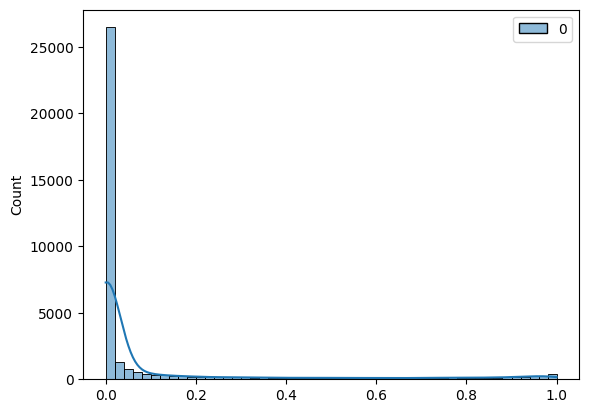

In [34]:
import seaborn as sns
sns.histplot(y_pred[:, 0:1], bins = 50, kde=True)

In [35]:
backtest_test['model_preds'] = y_pred[:, 0:1]
backtest_test['odds_preds'] = 1/ backtest_test['f_pm_01m']
backtest_test['model_edge_basic'] = backtest_test['model_preds'] - backtest_test['odds_preds']
backtest_test['model_edge_proportionate'] = backtest_test['model_preds'] / backtest_test['odds_preds']

/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_55092/3707614411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_test['model_preds'] = y_pred[:, 0:1]
/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_55092/3707614411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_test['odds_preds'] = 1/ backtest_test['f_pm_01m']
/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_55092/3707614411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [36]:
#backtest_test = backtest_test.drop(columns=['f_ko'])
model_preds_race = backtest_test.groupby('f_id').sum().reset_index()
model_preds_race2 = model_preds_race[['f_id', 'model_preds', 'odds_preds']]
dict_odds_preds = model_preds_race2.set_index('f_id')['odds_preds'].to_dict()
dict_race_preds = model_preds_race2.set_index('f_id')['model_preds'].to_dict()
backtest_test['race_model_preds'] = backtest_test['f_id'].map(dict_race_preds)
backtest_test['race_odds_preds'] = backtest_test['f_id'].map(dict_odds_preds)
backtest_test['model_preds_scaled'] = (backtest_test['model_preds'] / backtest_test['race_model_preds']) * backtest_test['race_odds_preds']
backtest_test['model_edge_basic_scaled'] = backtest_test['model_preds_scaled'] - backtest_test['odds_preds']
backtest_test['model_edge_prop_scaled'] = backtest_test['model_preds_scaled'] / backtest_test['odds_preds']

/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_55092/502887811.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_test['race_model_preds'] = backtest_test['f_id'].map(dict_race_preds)
/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_55092/502887811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_test['race_odds_preds'] = backtest_test['f_id'].map(dict_odds_preds)
/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_55092/502887811.py:8: SettingWithCopyWarni

In [37]:
backtest_test['model_preds'] = round(backtest_test['model_preds'],2)

/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_55092/2474238632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_test['model_preds'] = round(backtest_test['model_preds'],2)


In [38]:
backtest_test.head(2)

,f_ko,f_id,id,f_horse,f_pm_01m,linear_target,f_place,model_preds,odds_preds,model_edge_basic,model_edge_proportionate,race_model_preds,race_odds_preds,model_preds_scaled,model_edge_basic_scaled,model_edge_prop_scaled
70000,2022-10-08 15:40:00,1.665240e+13,1.665240e+13,Inchicore,28.0,-1.0,0,0.79,0.035714,0.756120,22.17136,11.663326,0.460674,0.031276,-0.004439,0.875717
70001,2022-10-08 15:10:00,1.665240e+13,1.665240e+13,Downforce,46.0,-1.0,0,0.79,0.021739,0.769446,36.39453,11.663326,0.460674,0.031250,0.009511,1.437499


/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_55092/957651885.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfall['cumulative_profit'] = dfall['linear_target'].cumsum()
/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_55092/957651885.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['cumulative_profit'] = df5['linear_target'].cumsum()
/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_55092/957651885.py:23: SettingWithCopyWarning: 
A value is trying to be set on 

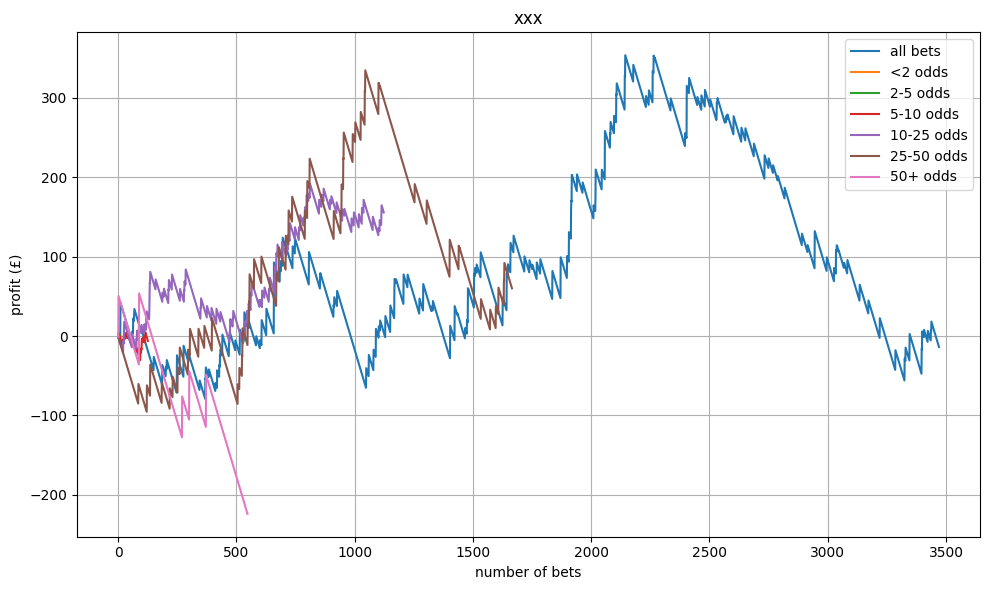

In [39]:
# Create dataframes of horses above specific proba_difference thresholds

all_bets = backtest_test[backtest_test['model_preds'] >= 0.5]
above0 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['f_pm_01m'] < 2)]
above5 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['f_pm_01m'] >= 2) & (backtest_test['f_pm_01m'] < 5)]
above10 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['f_pm_01m'] >= 5) & (backtest_test['f_pm_01m'] < 10)]
above15 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['f_pm_01m'] >= 10) & (backtest_test['f_pm_01m'] < 25)]
above20 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['f_pm_01m'] >= 25) & (backtest_test['f_pm_01m'] < 51)]
above30 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['f_pm_01m'] >= 52)]

# Calculate evolutions of profits for each threshold

dfall = all_bets
dfall['cumulative_profit'] = dfall['linear_target'].cumsum()

df0 = above0
df0['cumulative_profit'] = df0['linear_target'].cumsum()

df5 = above5
df5['cumulative_profit'] = df5['linear_target'].cumsum()

df10 = above10
df10['cumulative_profit'] = df10['linear_target'].cumsum()

df15 = above15
df15['cumulative_profit'] = df15['linear_target'].cumsum()

df20 = above20
df20['cumulative_profit'] = df20['linear_target'].cumsum()

df30 = above30
df30['cumulative_profit'] = df30['linear_target'].cumsum()

import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(dfall) + 1), dfall['cumulative_profit'], label='all bets')
plt.plot(range(1, len(df0) + 1), df0['cumulative_profit'], label='<2 odds')
plt.plot(range(1, len(df5) + 1), df5['cumulative_profit'], label='2-5 odds')
plt.plot(range(1, len(df10) + 1), df10['cumulative_profit'], label='5-10 odds')
plt.plot(range(1, len(df15) + 1), df15['cumulative_profit'], label='10-25 odds')
plt.plot(range(1, len(df20) + 1), df20['cumulative_profit'], label='25-50 odds')
plt.plot(range(1, len(df30) + 1), df30['cumulative_profit'], label='50+ odds')

plt.title("xxx")
plt.xlabel("number of bets")
plt.ylabel("profit (£)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history["val_loss"])
plt.show()

In [41]:
bets_50 = backtest_test[backtest_test['model_preds'] >= 0.5]

In [42]:
bets_50

,f_ko,f_id,id,f_horse,f_pm_01m,linear_target,f_place,model_preds,odds_preds,model_edge_basic,model_edge_proportionate,race_model_preds,race_odds_preds,model_preds_scaled,model_edge_basic_scaled,model_edge_prop_scaled
70000,2022-10-08 15:40:00,1.665240e+13,1.665240e+13,Inchicore,28.0,-1.0,0,0.79,0.035714,0.756120,22.171360,11.663326,0.460674,0.031276,-0.004439,0.875717
70001,2022-10-08 15:10:00,1.665240e+13,1.665240e+13,Downforce,46.0,-1.0,0,0.79,0.021739,0.769446,36.394530,11.663326,0.460674,0.031250,0.009511,1.437499
70002,2022-10-08 15:40:00,1.665240e+13,1.665240e+13,Call My Bluff,20.0,-1.0,0,0.56,0.050000,0.514380,11.287608,11.663326,0.460674,0.022292,-0.027708,0.445834
70005,2022-10-08 16:55:00,1.665240e+13,1.665240e+13,Shawaamekh,40.0,-1.0,0,0.90,0.025000,0.872164,35.886545,11.663326,0.460674,0.035436,0.010436,1.417435
70006,2022-10-08 15:40:00,1.665240e+13,1.665240e+13,Prince Imperial,27.0,-1.0,0,0.97,0.037037,0.928335,26.065041,11.663326,0.460674,0.038130,0.001093,1.029509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106241,2023-09-03 16:55:00,1.693760e+13,1.693760e+13,Angel Of The Sea,70.0,-1.0,0,0.78,0.014286,0.764951,54.546605,7.815952,3.004201,0.299514,0.285228,20.965962
106242,2023-09-03 16:55:00,1.693760e+13,1.693760e+13,Eagles Reign,50.0,-1.0,0,0.81,0.020000,0.787911,40.395528,7.815952,3.004201,0.310535,0.290535,15.526743
106243,2023-09-03 16:55:00,1.693760e+13,1.693760e+13,Ruler Of The River,65.0,-1.0,0,0.97,0.015385,0.950317,62.770579,7.815952,3.004201,0.371185,0.355800,24.126994
106244,2023-09-03 17:30:00,1.693760e+13,1.693760e+13,Rotolo,20.0,-1.0,0,0.86,0.050000,0.805563,17.111250,7.815952,3.004201,0.328851,0.278851,6.577015


In [43]:
bets_50.sum()

f_ko                        2022-10-08 15:40:002022-10-08 15:10:002022-10-...
f_id                                                      58387584100000000.0
id                                                        58387584100000000.0
f_horse                     InchicoreDownforceCall My BluffShawaamekhPrinc...
f_pm_01m                                                            120607.26
linear_target                                                         -13.768
f_place                                                                   156
model_preds                                                       2775.340088
odds_preds                                                          142.35591
model_edge_basic                                                   2632.90539
model_edge_proportionate                                          97748.31821
race_model_preds                                                 34428.293976
race_odds_preds                                                 

In [44]:
#MLP2.save_weights("custom_scorer0.05_7input_l16_05mfilter_01mplace")

In [46]:
bets_50.tail(50)

,f_ko,f_id,id,f_horse,f_pm_01m,linear_target,f_place,model_preds,odds_preds,model_edge_basic,model_edge_proportionate,race_model_preds,race_odds_preds,model_preds_scaled,model_edge_basic_scaled,model_edge_prop_scaled
105763,2023-08-31 18:45:00,1.693500e+13,1.693500e+13,Le Reveur,32.0,-1.000,0,0.51,0.031250,0.478193,16.302179,11.380358,8.923241,0.399450,0.368200,12.782399
105764,2023-08-31 16:25:00,1.693500e+13,1.693500e+13,James Bradley,13.5,-1.000,0,0.66,0.074074,0.583550,8.877926,11.380358,8.923241,0.515637,0.441563,6.961106
105766,2023-08-31 16:40:00,1.693500e+13,1.693500e+13,Enquire Within,15.5,13.775,1,0.83,0.064516,0.768549,12.912507,11.380358,8.923241,0.653199,0.588683,10.124586
105767,2023-08-31 17:45:00,1.693500e+13,1.693500e+13,Natchez Trace,16.0,-1.000,0,0.67,0.062500,0.603044,10.648707,11.380358,8.923241,0.521847,0.459347,8.349560
105768,2023-08-31 16:25:00,1.693500e+13,1.693500e+13,Lady Clemmie,14.5,-1.000,0,0.91,0.068966,0.837357,13.141672,11.380358,8.923241,0.710639,0.641674,10.304272
105769,2023-08-31 16:35:00,1.693500e+13,1.693500e+13,Humaniste,29.0,-1.000,0,0.68,0.034483,0.641007,19.589195,11.380358,8.923241,0.529645,0.495163,15.359719
105770,2023-08-31 16:40:00,1.693500e+13,1.693500e+13,Tenth Amendment,48.0,-1.000,0,0.87,0.020833,0.850545,41.826144,11.380358,8.923241,0.683240,0.662407,32.795520
105771,2023-08-31 17:45:00,1.693500e+13,1.693500e+13,Luckys Dream,28.0,-1.000,0,0.95,0.035714,0.913725,26.584290,11.380358,8.923241,0.744447,0.708733,20.844513
105772,2023-08-31 17:06:00,1.693500e+13,1.693500e+13,The Conqueror,24.0,-1.000,0,0.93,0.041667,0.886676,22.280223,11.380358,8.923241,0.727905,0.686239,17.469732
105773,2023-08-31 17:06:00,1.693500e+13,1.693500e+13,Runner Bean,55.0,-1.000,0,0.84,0.018182,0.822828,46.255535,11.380358,8.923241,0.659429,0.641247,36.268568


In [48]:
X_test.shape

(36246, 7)

In [49]:
humtaza = X_test.iloc[36239:36240]

In [50]:
humtaza

,stall_position,iv_trainer_l16r,iv_jockey_l16r,ae_trainer_l16r,ae_jockey_l16r,pred_isp_prob,f_runners
106239,0.014139,0.0,0.249485,0.0,0.022876,0.058824,0.5


In [51]:
humtaza_pred = MLP2.predict(humtaza)
humtaza_pred

1/1 [==============================] - 0s 13ms/step


array([[0.66171014, 0.3382899 ]], dtype=float32)